### Use decision trees to prepare a model on fraud data 
- treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
# Underlying information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
Undergrad          600 non-null object
Marital.Status     600 non-null object
Taxable.Income     600 non-null int64
City.Population    600 non-null int64
Work.Experience    600 non-null int64
Urban              600 non-null object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
# Converting the categorical columns into numeric columns using Label encoding
cols = ['Undergrad','Marital.Status', 'Urban']

# Encode labels of above columns
data[cols] = data[cols].apply(LabelEncoder().fit_transform)

data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [5]:
# Statistics of the data
data.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000


In [6]:
# Converting the Taxable.Income column into categorical based on the taxable_income if <= 30000 as "Risky" and others are "Good"
TI_cat = []
for value in data['Taxable.Income']:
    if value <= 30000:
        TI_cat.append('Risky')
    else:
        TI_cat.append('Good')
data['TI_cat'] = TI_cat
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TI_cat
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [7]:
# Deviding the data into input X
X = data.drop(['Taxable.Income','TI_cat'], axis=1)
X.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [8]:
# Deviding the data into output y
y = data['TI_cat']
y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: TI_cat, dtype: object

In [9]:
#Unique values in result
y.unique()

array(['Good', 'Risky'], dtype=object)

In [10]:
#Count of output values
y.value_counts()

Good     476
Risky    124
Name: TI_cat, dtype: int64

In [11]:
#Splitting the data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20,random_state = 1)

### Building Decision Tree Classifier using Entropy Criteria 

In [12]:
#Building the model using entropy criterion
model = DecisionTreeClassifier(criterion='entropy', random_state=1,max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

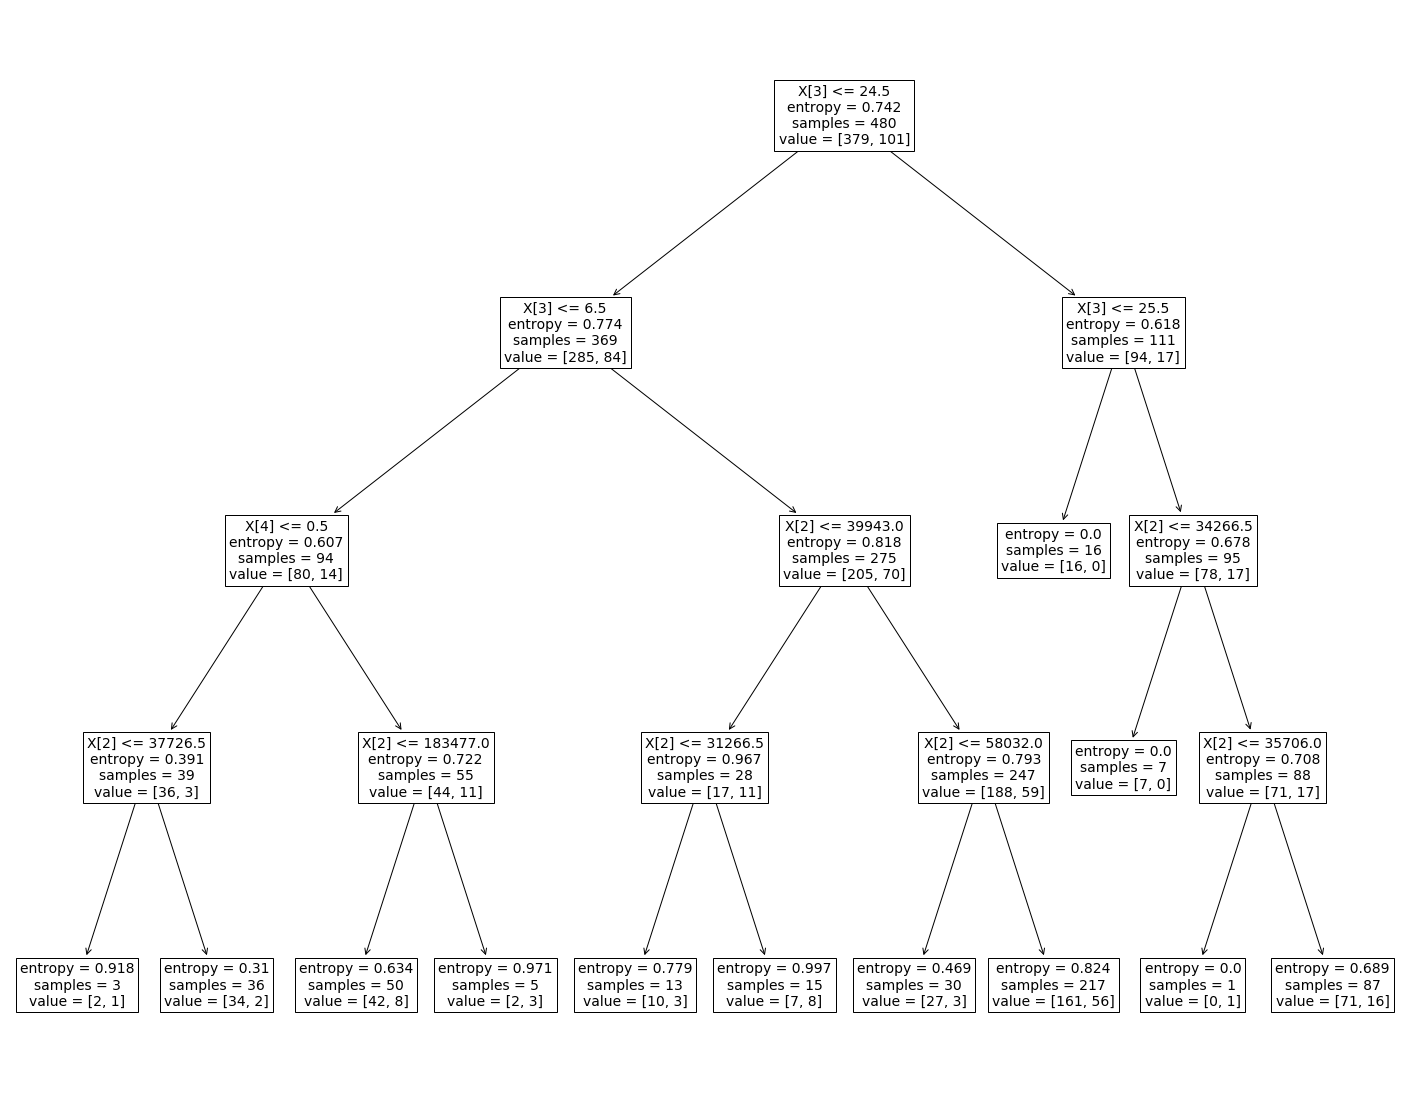

In [13]:
#Plotting the desicion tree
plt.figure(figsize=(25,20))
tree.plot_tree(model);

Text(0.5, 1.0, 'Decision tree based on entropy')

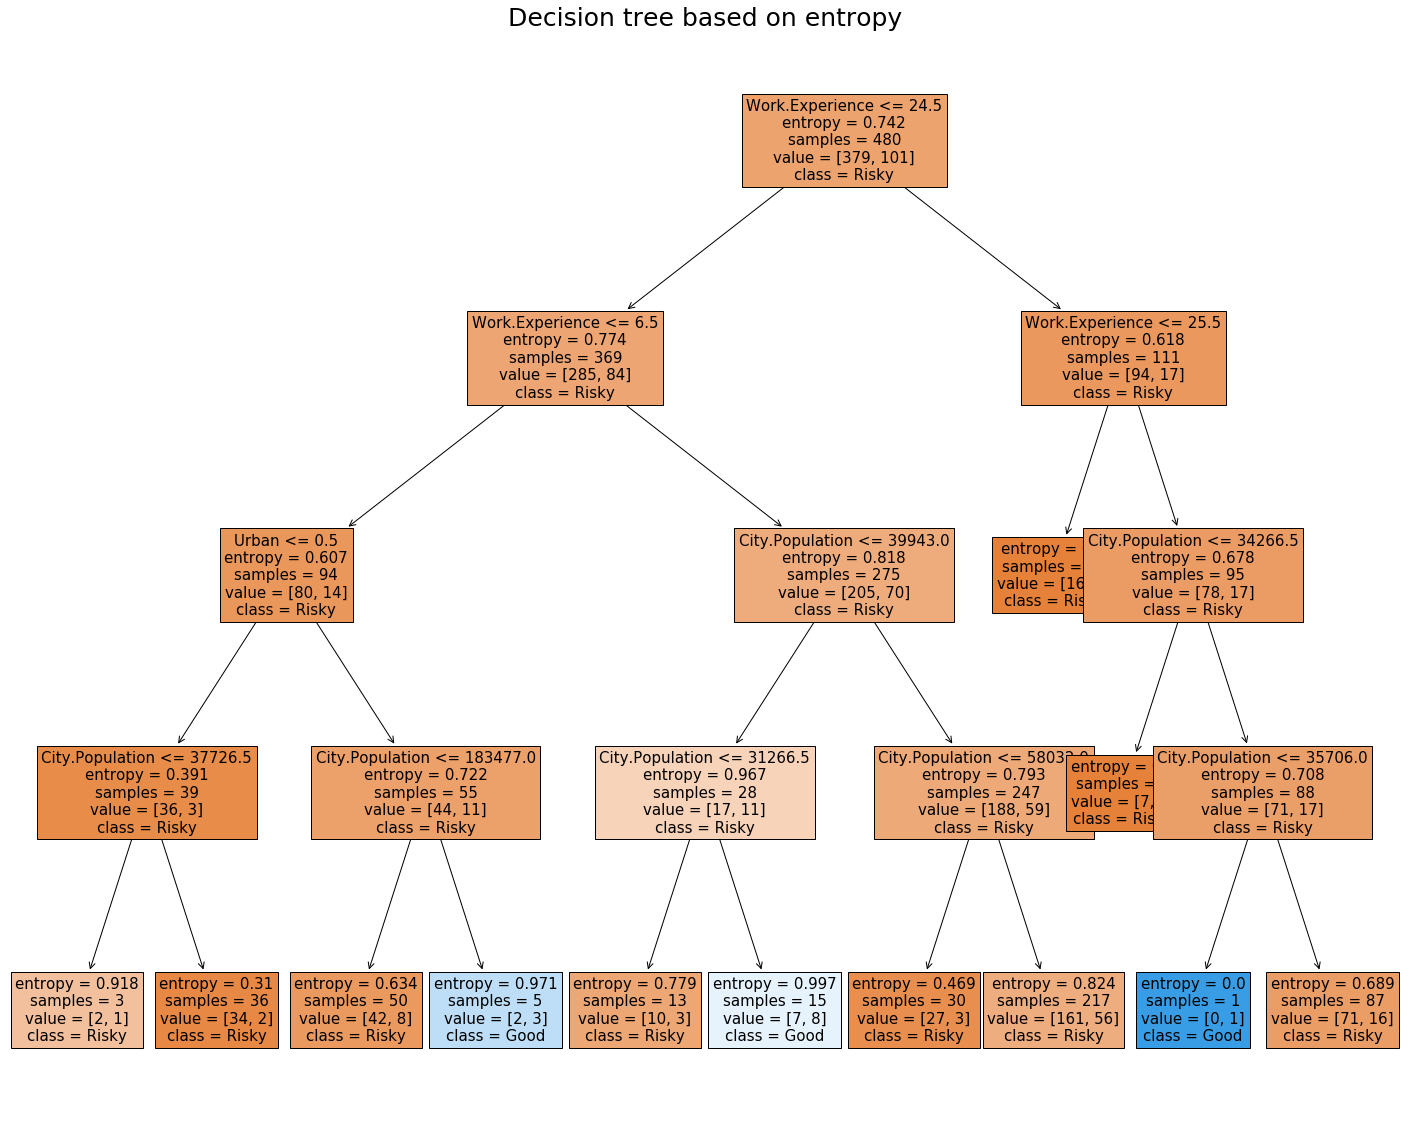

In [14]:
#Plotting the decision tree with meaningful information to improve the understandability
plt.figure(figsize=(25,20))
tree.plot_tree(model, feature_names=['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban'], class_names=['Risky','Good'], fontsize=15,filled=True);
plt.title('Decision tree based on entropy', fontsize= 25)

In [15]:
#Predictions based on the trained model
pred = model.predict(X_test)
pd.Series(pred).value_counts()

Good     112
Risky      8
dtype: int64

In [16]:
# Cross validation
pd.crosstab(y_test,pred)

col_0,Good,Risky
TI_cat,,
Good,90,7
Risky,22,1


In [17]:
#Accuracy
np.mean(pred == y_test)

0.7583333333333333

In [18]:
#Features with importance based on above model
model.feature_importances_

array([0.        , 0.        , 0.57571687, 0.34894195, 0.07534117])

In [19]:
#Creating a series out of features score
fn = ['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban']
F_entropy= pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
F_entropy

City.Population    0.575717
Work.Experience    0.348942
Urban              0.075341
Marital.Status     0.000000
Undergrad          0.000000
dtype: float64

#### Best features based on entropy bsed decision tree are City.Population, Work.Experience, Urban

### Building Decision Tree Classifier (CART) using Gini Criteria

In [20]:
# Buliding a model based on gini impurity criterion
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

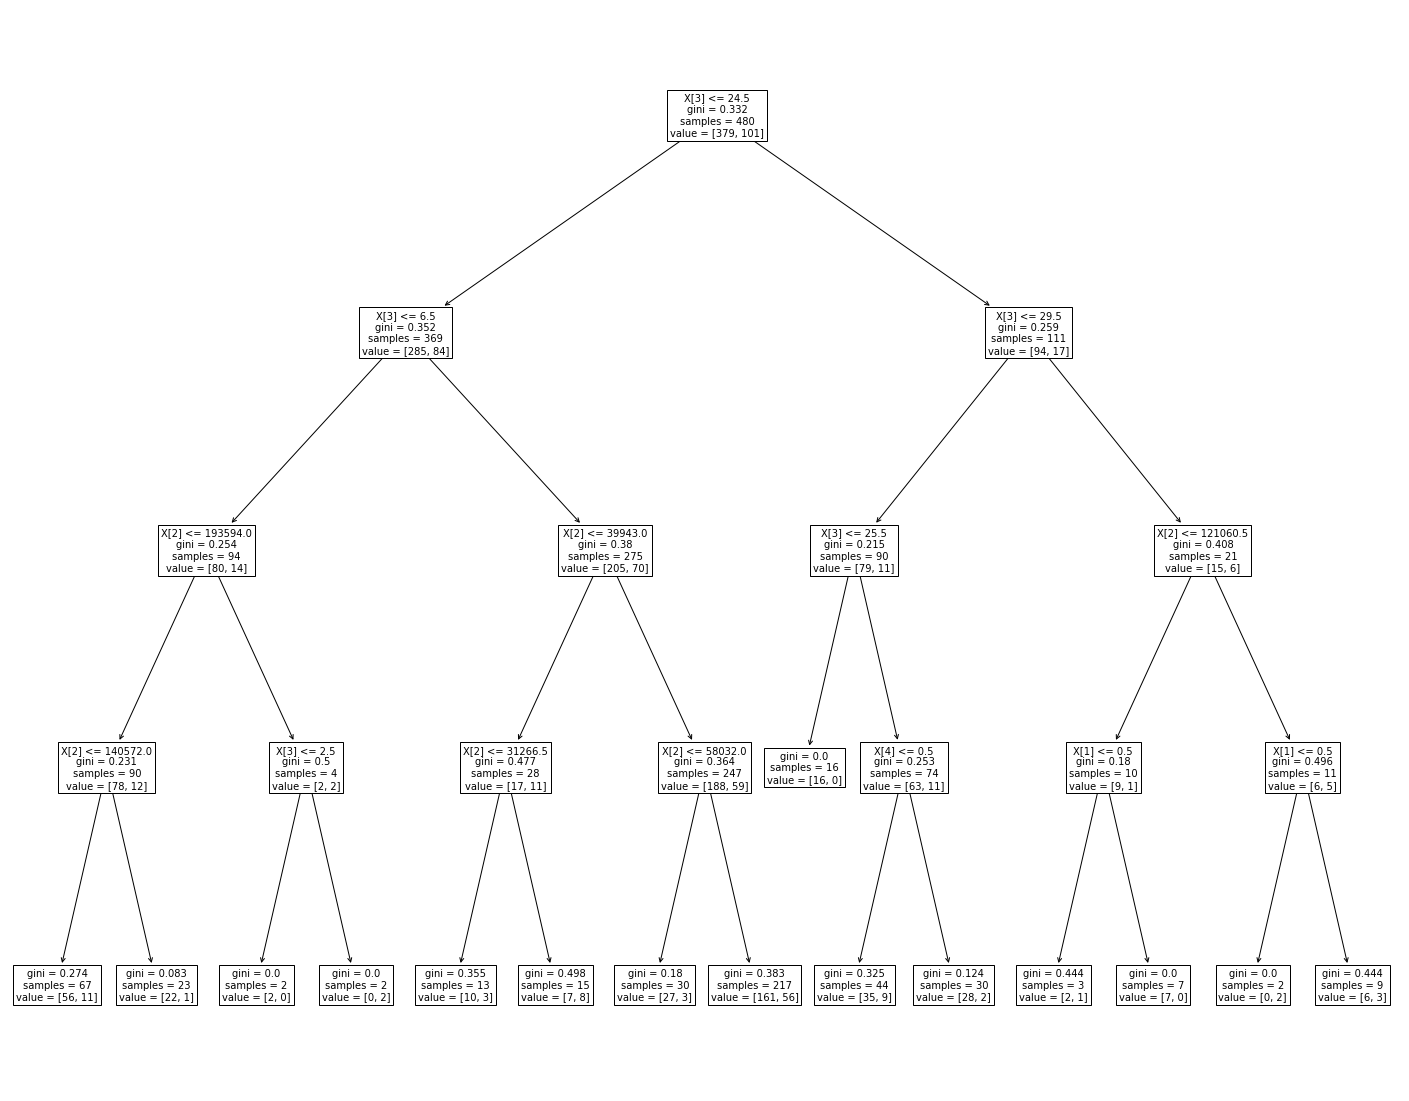

In [21]:
#Plotting the decision tree
plt.figure(figsize=(25,20))
tree.plot_tree(model_gini);

Text(0.5, 1.0, 'Decision tree based on gini impurity')

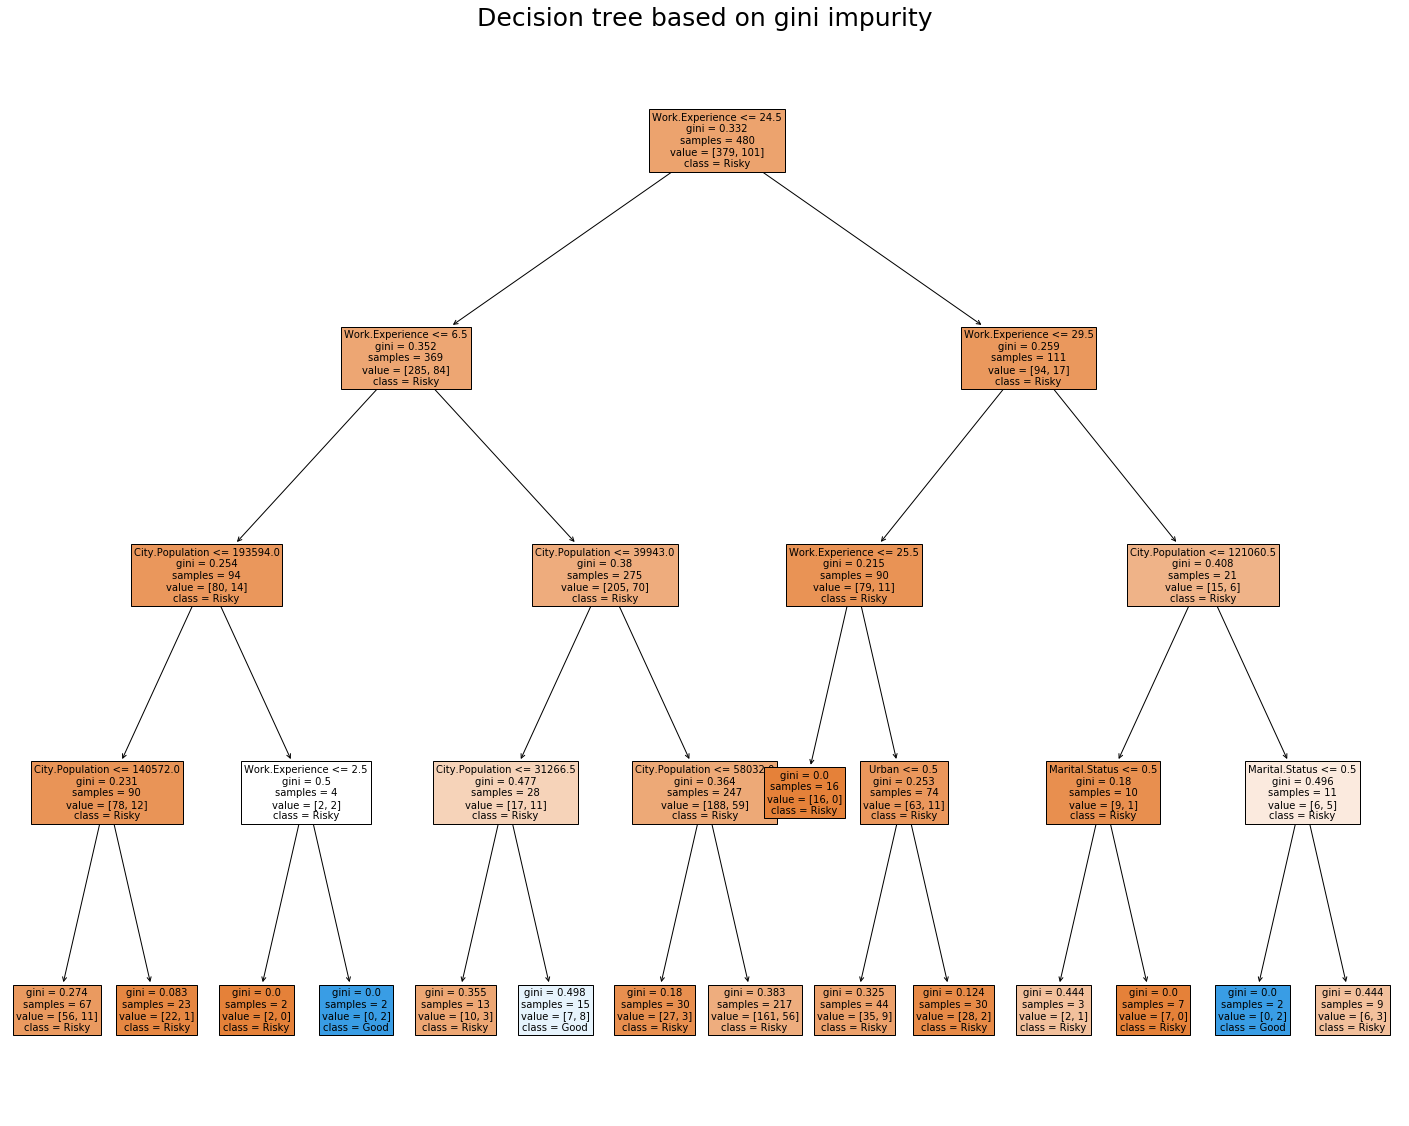

In [22]:
#Plotting the decision tree with meaningful information to improve the understandability
plt.figure(figsize=(25,20))
tree.plot_tree(model_gini,feature_names=['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban'], class_names=['Risky','Good'],filled=True,fontsize=10)
plt.title('Decision tree based on gini impurity', fontsize= 25)

In [23]:
#Predicting based on the trained gini based model
pred_gini = model_gini.predict(X_test)
pd.Series(pred_gini).value_counts()

Good     112
Risky      8
dtype: int64

In [24]:
#Cross validation
pd.crosstab(pred_gini,y_test)

TI_cat,Good,Risky
row_0,,
Good,90,22
Risky,7,1


In [25]:
#Accuracy
np.mean(pred_gini == y_test)

0.7583333333333333

In [26]:
#Best features based on gini model
model_gini.feature_importances_

array([0.        , 0.12613781, 0.43531965, 0.39401414, 0.0445284 ])

In [27]:
#Creating a series of features scores
fn = ['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban']
F_gini= pd.Series(model_gini.feature_importances_,index=fn).sort_values(ascending=False)
F_gini

City.Population    0.435320
Work.Experience    0.394014
Marital.Status     0.126138
Urban              0.044528
Undergrad          0.000000
dtype: float64

#### Based on gini criterion model, the best features are City.Population, Work.Experience, Marital.Status,Urban

In [28]:
#Combining the feature scores of 2 models into one series
columns = {'F_entropy': F_entropy, 'F_gini': F_gini}
pd.concat(columns, axis=1, sort = False) 

,F_entropy,F_gini
City.Population,0.575717,0.435320
Work.Experience,0.348942,0.394014
Urban,0.075341,0.044528
Marital.Status,0.000000,0.126138
Undergrad,0.000000,0.000000


## Conclusion:

#### As per the above Decision trees based on the entropy and gini impurity, following are the key features to determine the fraud:
- City.Population
- Work.Experience
- Urban